In [54]:
import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

In [27]:
SG= pd.read_csv('https://raw.githubusercontent.com/nelsoniu/vaccine_accessibility/main/vaccination_sites/sg_vaccination_sites.csv')

In [68]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(SG['Longitude'], SG['Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(SG, crs=crs, geometry=geometry)

/Users/niu/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [69]:
# Supply Points
SG

,Name,Address,Vaccine Type,Type,Longitude,Latitude,geometry
0,Raffles Medical Clinic Holland Village,"118 Holland Avenue, Singapore 278997",Pfizer,Clinic,103.7961,1.310531,POINT (103.79610 1.31053)
1,Mei Ling Clinic,"158 Mei Ling Street, Singapore 140158",Pfizer,Clinic,103.8027,1.292644,POINT (103.80270 1.29264)
2,Family Medicine Clinic Chinatown,"133 New Bridge Road, Singapore 059413",Pfizer,Clinic,103.8447,1.285209,POINT (103.84470 1.28521)
3,Medihealth Bishan Clinic & Surgery,"121 Bishan Street 12, Singapore 570121",Pfizer,Clinic,103.8511,1.347274,POINT (103.85110 1.34727)
4,Shenton Medical Group Alexndra Retail Centre,"460 Alexandra Road, Singapore 119963",Pfizer,Clinic,103.8015,1.273676,POINT (103.80150 1.27368)
...,...,...,...,...,...,...,...
74,Yuhua Community Club,"90 Boon Lay Way, Singapore 609958",Pfizer,Vaccination Centre,103.7372,1.340112,POINT (103.73720 1.34011)
75,Nanyang Community Club,"60 Jurong West Street 91, Singapore 649040",Pfizer,Vaccination Centre,103.6924,1.342565,POINT (103.69240 1.34257)
76,Clementi Community Centre,"220 Clementi Avenue 4, Singapore 129880",Pfizer,Vaccination Centre,103.7681,1.318849,POINT (103.76810 1.31885)
77,Senja-Cashew Community Club,"101 Bukit Panjang Road, Singapore 679910",Pfizer,Vaccination Centre,103.7647,1.381562,POINT (103.76470 1.38156)


In [59]:
# Load in Singapore subzone shapefile

SG_boundary = gpd.read_file('sg_subzone.zip')
SG_boundary = SG_boundary.to_crs('SVY21')

<AxesSubplot:>

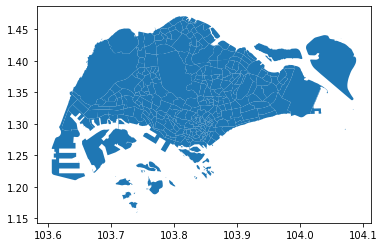

In [43]:
SG_boundary.plot()

In [45]:
# Get centroid 
for i in range(0,len(SG_boundary)):
    SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
    SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]

<ipython-input-45-f359949d698e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
<ipython-input-45-f359949d698e>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]


In [70]:
SG_boundary

,OBJECTID,SUBZONE_N,PLN_AREA_N,TOTAL,BET0TO4,BET5TO9,BET10TO14,BET15TO19,BET20TO24,BET25TO29,...,BET75TO79,BET80TO84,OVER85,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,PASIR PANJANG 1,QUEENSTOWN,4090.0,210.0,210.0,190.0,220.0,260.0,290.0,...,80.0,40.0,50.0,3470490CA5ED5ED5,2016-09-22,22077.3383,29893.7812,6571.323082,1.084792e+06,"POLYGON ((103.77039 1.29249, 103.77036 1.29240..."
1,2,QUEENSWAY,QUEENSTOWN,280.0,0.0,10.0,10.0,10.0,20.0,20.0,...,10.0,0.0,0.0,FB54F4357BE67F19,2016-09-22,24168.3106,30104.1768,3454.239283,6.316443e+05,"POLYGON ((103.80162 1.28416, 103.80159 1.28410..."
2,3,KENT RIDGE,QUEENSTOWN,1020.0,20.0,50.0,60.0,40.0,60.0,90.0,...,30.0,10.0,0.0,94BC564228E23B53,2016-09-22,23464.8409,29725.3706,7439.547656,1.826849e+06,"POLYGON ((103.79138 1.29026, 103.79279 1.28911..."
3,4,ALEXANDRA NORTH,BUKIT MERAH,1040.0,60.0,70.0,50.0,60.0,40.0,70.0,...,20.0,0.0,0.0,026E408A08774C44,2016-09-22,26548.2507,30519.3922,2907.051461,2.937064e+05,"POLYGON ((103.81743 1.29431, 103.81787 1.29393..."
4,5,MARINA EAST,MARINA EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7463501529F5588E,2016-09-22,32344.0489,30103.2495,6470.949643,1.844061e+06,"POLYGON ((103.88017 1.28384, 103.88016 1.28384..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,THE WHARVES,SEMBAWANG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,C0F013DFA1BD2609,2016-09-22,26945.0680,49552.7904,11828.877719,1.635808e+06,"POLYGON ((103.81732 1.47077, 103.81732 1.47070..."
319,320,SENOKO NORTH,SEMBAWANG,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,05D0CDFA55EBFF90,2016-09-22,24665.7878,49482.5953,7392.128851,2.241387e+06,"POLYGON ((103.81577 1.47062, 103.81578 1.47047..."
320,321,CHANGI POINT,CHANGI,770.0,20.0,30.0,30.0,50.0,40.0,40.0,...,30.0,20.0,30.0,08E1CF09627396E1,2016-09-22,44603.6326,41360.4186,4897.482363,9.959448e+05,"POLYGON ((103.98236 1.39356, 103.98242 1.39349..."
321,322,SENGKANG TOWN CENTRE,SENGKANG,55740.0,3210.0,3570.0,3360.0,3890.0,3530.0,3630.0,...,750.0,450.0,390.0,E01905552A9FA608,2016-09-22,35163.8120,41501.1418,5216.400502,1.455508e+06,"POLYGON ((103.90175 1.38699, 103.90170 1.38654..."
